### とにかく「shit + Enter」を押していくと、上から実行していきます。


In [1]:
######################################################################################
######################################################################################
# Cohen's Weighted kappaの症例数はどのぐらい必要か？
######################################################################################
######################################################################################

In [2]:
# import
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy # pip install scipy
import statsmodels # pip install statsmodels


,Evaluator_1,Evaluator_2
0,4.0,1.0
1,5.0,2.0
2,0.0,0.0
3,0.0,1.0
4,3.0,5.0
...,...,...
95,2.0,3.0
96,3.0,0.0
97,3.0,1.0
98,1.0,1.0


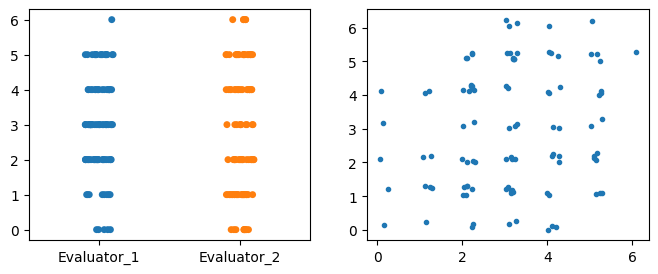

In [3]:
# 適当にデータを作ります。
N=100
x = np.zeros([N,2])
x0 = np.random.choice(np.arange(0, 3), size=N, replace=True)
x[:,0] = x0 + np.random.choice(np.arange(0, 5), size=N, replace=True)
x[:,1] = x0 + np.random.choice(np.arange(0, 5), size=N, replace=True)

df = pd.DataFrame(x)
df.columns = ['Evaluator_1','Evaluator_2']

plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
sns.stripplot( data=df )

plt.subplot(1,2,2)
plt.plot( df['Evaluator_1']+np.random.random(N)*0.3,df['Evaluator_2']+np.random.random(N)*0.3,'.' )

df


In [4]:
# Weighted kappaの計算
from sklearn.metrics import cohen_kappa_score

weighted_kappa = cohen_kappa_score(df['Evaluator_1'], df['Evaluator_2'], weights='quadratic')
print(f'Weighted Kappa: {weighted_kappa}')


Weighted Kappa: 0.1739419801902674


100%|██████████| 1000/1000 [00:05<00:00, 190.25it/s]


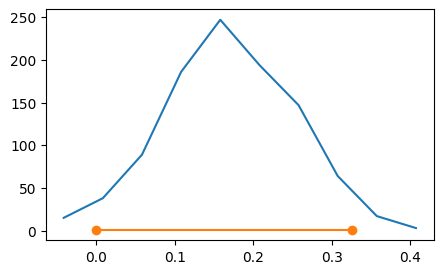

In [5]:
# Weighted kappaにおける結果をブートストラップで確かめてみる(0を含まないか？)

from sklearn.utils import resample

n_repeat = 1000
kappas = []

for i in tqdm(range(n_repeat)):
    # データを再サンプリング
    bootstrapped_df = resample(df)
    # 評価者のデータを取得
    kappa = cohen_kappa_score(bootstrapped_df['Evaluator_1'], bootstrapped_df['Evaluator_2'], weights='quadratic')
    kappas.append(kappa)

# ブートストラップの分布から信頼区間を計算
kappa_lower = np.percentile(kappas, 2.5)
kappa_upper = np.percentile(kappas, 97.5)

freq = np.histogram(kappas)
plt.figure(figsize=(5,3))
plt.plot( freq[1][1:]-(freq[1][1]-freq[1][0])/2, freq[0] )
plt.plot([kappa_lower,kappa_upper],[1,1],'o-')


100%|██████████| 1000/1000 [00:01<00:00, 519.19it/s]


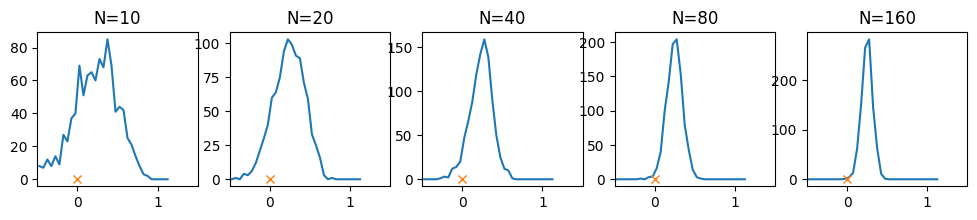

In [6]:
# 同様にして、いろんなNで乱数を変えてやってみる。（上記のBootstrapとは違う）

Nlist = [10,20,40,80,160]
n_repeat = 1000
plt.figure(figsize=(12,2))

for k in range(len(Nlist)):
  N = Nlist[k]
  kappas = []
  for i in tqdm(range(n_repeat)):
      x = np.zeros([N,2])
      x0 = np.random.choice(np.arange(0, 3), size=N, replace=True)

      x[:,0] = x0 + np.random.choice(np.arange(0, 5), size=N, replace=True)
      x[:,1] = x0 + np.random.choice(np.arange(0, 5), size=N, replace=True)

      df = pd.DataFrame(x)
      df.columns = ['Evaluator_1','Evaluator_2']
      # 評価者のデータを取得
      kappa = cohen_kappa_score(df['Evaluator_1'], df['Evaluator_2'], weights='quadratic')
      kappas.append(kappa)

  xbins = np.arange(-0.5,1.2,0.05)
  freq = np.histogram(kappas, bins=xbins)
  plt.subplot(1,len(Nlist),k+1)
  plt.plot( freq[1][1:]-(freq[1][1]-freq[1][0])/2, freq[0] )
  plt.plot([0],[0],'x')
  plt.xlim([-0.5,1.5])
  plt.title(f'N={N}')
